<a href="https://colab.research.google.com/github/Mounika-Selvaraj/AI-PROJECTS/blob/main/Blood_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split


# Path to dataset
dataset_path = '/content/drive/MyDrive/dataset_blood_group'
img_size = 128  # Resize images to 128x128 for faster processing
classes = ['A-', 'A+', 'AB-', 'AB+', 'B-', 'B+', 'O-', 'O+']


In [33]:
def load_images_with_datagen(dataset_path, img_size):
    datagen = ImageDataGenerator(rescale=1./255)

    # Flow images from directory (set up with data augmentation for training)
    train_generator = datagen.flow_from_directory(
        dataset_path,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='sparse',
        shuffle=True
    )

    return train_generator

train_gen = load_images_with_datagen(dataset_path, img_size)


Found 6096 images belonging to 8 classes.


In [37]:
def create_model():
    # Load MobileNetV2 as base model (pretrained on ImageNet)
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
    base_model.trainable = False  # Freeze the base model layers

    # Custom layers for classification
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(len(classes), activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_model()


In [40]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=30,
    verbose=1
)


Epoch 1/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9261 - loss: 0.1970
Epoch 2/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 59us/step - accuracy: 0.9062 - loss: 0.3123
Epoch 3/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9028 - loss: 0.2585
Epoch 4/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.9375 - loss: 0.1794
Epoch 5/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9416 - loss: 0.1599
Epoch 6/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 0.9375 - loss: 0.2618
Epoch 7/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.9446 - loss: 0.1572
Epoch 8/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.9062 - loss: 0.2881
Epoch 9/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9232 - loss: 0.1972
Epoch 10/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 48us/step - accuracy: 0.8750 - loss: 0.2893
Epoch 11/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.9573 - loss: 0.1204
Epoch 12/30
190/190 ━━━━━━━━━━

In [45]:
# Load test data using a separate generator
test_gen = load_images_with_datagen('/content/drive/MyDrive/dataset_blood_group/', img_size)

test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Found 6096 images belonging to 8 classes.
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9866 - loss: 0.0467
Test Accuracy: 98.82%


In [46]:
model.save('/content/drive/My Drive/blood_group_model_v2.h5')

In [49]:
model.save('/content/drive/My Drive/blood_group_model.keras')


In [44]:
def predict_blood_group(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (img_size, img_size)) / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    return classes[np.argmax(prediction)]

# Test with a sample image
result = predict_blood_group('/content/drive/MyDrive/images/img_3.jpg', model)
print(f"Predicted Blood Group: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Blood Group: O+


191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step
              precision    recall  f1-score   support

          A-       0.08      0.08      0.08       565
          A+       0.16      0.16      0.16      1019
         AB-       0.14      0.14      0.14       740
         AB+       0.14      0.14      0.14       781
          B-       0.10      0.10      0.10       652
          B+       0.10      0.10      0.10       751
          O-       0.14      0.14      0.14       852
          O+       0.13      0.13      0.13       736

    accuracy                           0.13      6096
   macro avg       0.12      0.12      0.12      6096
weighted avg       0.13      0.13      0.13      6096



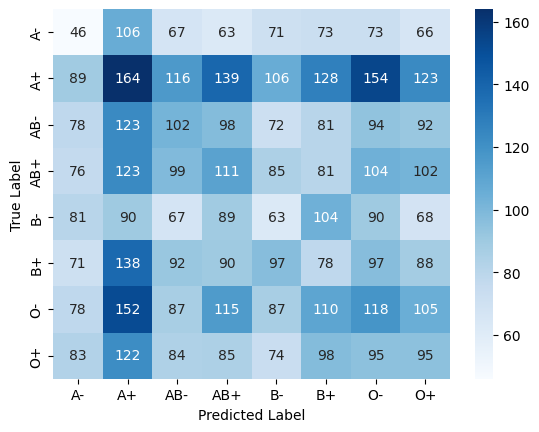

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes on the test set
test_gen.reset()
predictions = model.predict(test_gen)
y_pred = np.argmax(predictions, axis=1)

# Get true labels
y_true = test_gen.classes

# Classification report
print(classification_report(y_true, y_pred, target_names=classes))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
